# Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import os

#Importing tqdm for tracking of yaml to Dataframe (Progess bar)
from tqdm import tqdm

#Importing safe_load to Parse all YAML documents in a stream and produce corresponding Python objects
from yaml import safe_load


In [ ]:
file_Names = []
for single_file in os.listdir('t20s'):
    file_Names.append(os.path.join('t20s',single_file))

file_Names[:5]

['t20s\\1001349.yaml',
 't20s\\1001351.yaml',
 't20s\\1001353.yaml',
 't20s\\1004729.yaml',
 't20s\\1007655.yaml']

![image.png](attachment:image.png)

In [ ]:
backupFile = df

In [ ]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,[2017-02-17],male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,[2017-02-19],male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,[2017-02-22],male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,[2016-09-05],male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,[2016-06-18],male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We have Both Women and Man matches so we drop all Women Matches

In [ ]:
df['info.gender'].value_counts()

male      966
female    466
Name: info.gender, dtype: int64

In [ ]:
#droped all women rows
df = df[df['info.gender']=='male']

In [ ]:
df.drop(columns=['info.gender'],inplace=True)

KeyError: "['info.gender'] not found in axis"

In [ ]:
df.count()

innings                        966
meta.data_version              966
meta.created                   966
meta.revision                  966
info.dates                     966
info.match_type                966
info.outcome.by.wickets        445
info.outcome.winner            930
info.overs                     966
info.player_of_match           868
info.teams                     966
info.toss.decision             966
info.toss.winner               966
info.umpires                   956
info.venue                     966
match_id                       966
info.city                      827
info.outcome.by.runs           485
info.match_type_number         391
info.neutral_venue             259
info.outcome.method             34
info.outcome.result             36
info.outcome.eliminator         12
info.supersubs.New Zealand       1
info.supersubs.South Africa      1
info.bowl_out                    2
info.outcome.bowl_out            2
dtype: int64

#### Droping all 50 over Matches

In [ ]:
df['info.overs'].value_counts()

20    963
50      3
Name: info.overs, dtype: int64

In [ ]:
df = df[df['info.overs']== 20]

In [ ]:
df.drop(columns = ['info.overs' ] ,inplace =True)

C:\Users\abrar\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Removing All unNeeded Columns

In [ ]:
df.columns

Index(['innings', 'meta.data_version', 'meta.created', 'meta.revision',
       'info.dates', 'info.match_type', 'info.outcome.by.wickets',
       'info.outcome.winner', 'info.player_of_match', 'info.teams',
       'info.toss.decision', 'info.toss.winner', 'info.umpires', 'info.venue',
       'match_id', 'info.city', 'info.outcome.by.runs',
       'info.match_type_number', 'info.neutral_venue', 'info.outcome.method',
       'info.outcome.result', 'info.outcome.eliminator',
       'info.supersubs.New Zealand', 'info.supersubs.South Africa',
       'info.bowl_out', 'info.outcome.bowl_out'],
      dtype='object')

In [ ]:
df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets',
    'info.match_type'
],inplace=True)

C:\Users\abrar\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df.columns

Index(['innings', 'info.dates', 'info.outcome.winner', 'info.player_of_match',
       'info.teams', 'info.toss.decision', 'info.toss.winner', 'info.umpires',
       'info.venue', 'match_id', 'info.city'],
      dtype='object')

In [ ]:
df_copy = df.copy()

In [ ]:
df.iloc[0]

innings                 [{'1st innings': {'team': 'Australia', 'delive...
info.dates                                                   [2017-02-17]
info.outcome.winner                                             Sri Lanka
info.player_of_match                                      [DAS Gunaratne]
info.teams                                         [Australia, Sri Lanka]
info.toss.decision                                                  field
info.toss.winner                                                Sri Lanka
info.umpires                                       [MD Martell, P Wilson]
info.venue                                       Melbourne Cricket Ground
match_id                                                                1
info.city                                                             NaN
Name: 0, dtype: object

In [ ]:
df.iloc[0]['innings']

[{'1st innings': {'team': 'Australia',
   'deliveries': [{0.1: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.2: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.3: {'batsman': 'AJ Finch',
      'bowler': 'SL Malinga',
      'non_striker': 'M Klinger',
      'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
    {0.4: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
    {0.5: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.6: {'batsman': 'M Klinger',
      'bowler': 'SL Malinga',
      'non_striker': 'AJ Finch',
      'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
    {1.1: {'batsm

### First Index Match -> First Innings -> Deliveries 

In [ ]:
df.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {1.1: {'batsman': 'M Klinger',
   'bowler': 'KMDN Kulasekara',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 

#### Now we have to seperate all matches first inning data into single rows

In [ ]:
count = 1
df2 = pd.DataFrame()
# single match
for index, row in df.iterrows():
    count+=1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    dismissed_Player = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []
    
    #single match -> first innings
    for ball in row['innings'][0]['1st innings']['deliveries']:
        
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                dismissed_Player.append(ball[key]['wicket']['player_out'])
            except:
                dismissed_Player.append('0')
    result = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'bowler':bowler,
            'runs':runs,
            'dismissed_Player':dismissed_Player,
            'city':city,
            'venue':venue
        })
    df2 = df2.append(result)

In [ ]:
#now we Have ball by ball data
df2.head()

,match_id,teams,batting_team,ball,batsman,bowler,runs,dismissed_Player,city,venue
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground
3,2,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground
4,2,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground


#### We have Only batting Team so, Now we have to make new column contains bowling team 

In [ ]:
def bowlingTeam(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team 

In [ ]:
df2['bowling_team'] = df2.apply(bowlingTeam,axis=1)

In [ ]:
df2.head(3)

,match_id,teams,batting_team,ball,batsman,bowler,runs,dismissed_Player,city,venue,bowling_team
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka


In [ ]:
df2.drop(columns=['teams'],inplace=True)

### Handling Teams 

In [ ]:
df2['batting_team'].unique()

array(['Australia', 'Hong Kong', 'Zimbabwe', 'India', 'Bangladesh',
       'New Zealand', 'South Africa', 'England', 'West Indies', 'Ireland',
       'Afghanistan', 'Pakistan', 'United Arab Emirates', 'Scotland',
       'Oman', 'Papua New Guinea', 'Sri Lanka', 'Netherlands', 'Nepal',
       'Vanuatu', 'Philippines', 'United States of America', 'Germany',
       'Ghana', 'Uganda', 'Kenya', 'Namibia', 'Nigeria', 'Botswana',
       'Guernsey', 'Denmark', 'Jersey', 'Italy', 'Norway', 'Thailand',
       'Malaysia', 'Maldives', 'Singapore', 'Kuwait', 'Bermuda', 'Canada',
       'Cayman Islands', 'Portugal', 'Gibraltar', 'Spain', 'Bhutan',
       'Qatar', 'Iran', 'Belgium', 'Isle of Man', 'Bulgaria', 'Romania'],
      dtype=object)

#### We have so many teams which we don't need so we drop all unneeded teams from our dataset

In [ ]:
top_teams = [
    'Pakistan',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'Sri Lanka'    
]

In [ ]:
df2 = df2[df2['batting_team'].isin(top_teams)]

In [ ]:
df2 = df2[df2['bowling_team'].isin(top_teams)]

In [ ]:
df2['batting_team'].unique()

array(['Australia', 'Bangladesh', 'New Zealand', 'South Africa',
       'England', 'West Indies', 'India', 'Pakistan', 'Afghanistan',
       'Sri Lanka'], dtype=object)

### Handling Missing Values

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64741 entries, 0 to 125
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          64741 non-null  int64  
 1   batting_team      64741 non-null  object 
 2   ball              64741 non-null  float64
 3   batsman           64741 non-null  object 
 4   bowler            64741 non-null  object 
 5   runs              64741 non-null  int64  
 6   dismissed_Player  64741 non-null  object 
 7   city              56070 non-null  object 
 8   venue             64741 non-null  object 
 9   bowling_team      64741 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.4+ MB


In [ ]:
import seaborn as sns

<AxesSubplot:>

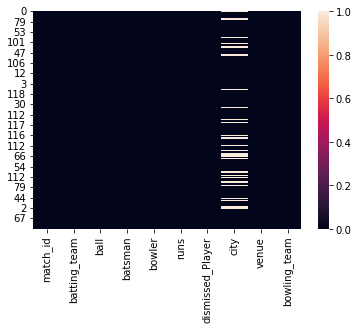

In [ ]:
sns.heatmap(df2.isnull())

In [ ]:
df2[df2['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        3092
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

#### In order to fill missing cities we have to extract first word of venue

In [ ]:
df3 = df2[['match_id','batting_team','bowling_team','ball','runs','dismissed_Player','city','venue']]

In [ ]:
output_cities = np.where(df3['city'].isnull(), df3['venue'].str.split().apply(lambda x:x[0]), df3['city'])

In [ ]:
df3['city'] = output_cities

C:\Users\abrar\AppData\Local\Temp/ipykernel_11428/3705659827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['city'] = output_cities


In [ ]:
df3.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
dismissed_Player    0
city                0
venue               0
dtype: int64

<AxesSubplot:>

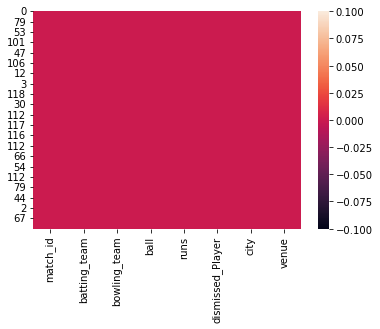

In [ ]:
sns.heatmap(df3.isnull())

In [ ]:
df3.drop(columns=['venue'],inplace=True)

C:\Users\abrar\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df3.columns

Index(['match_id', 'batting_team', 'bowling_team', 'ball', 'runs',
       'dismissed_Player', 'city'],
      dtype='object')

In [ ]:
df3

,match_id,batting_team,bowling_team,ball,runs,dismissed_Player,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [ ]:
total_result = df3.groupby('match_id').sum()['runs'].reset_index()
df3 =df3.merge(total_result,on='match_id')

KeyError: 'runs'

In [ ]:
df3

,match_id,batting_team,bowling_team,ball,runs_x,dismissed_Player,city,runs_y
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,168
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,168
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,168
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,168
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,168
...,...,...,...,...,...,...,...,...
64736,964,Sri Lanka,Australia,19.3,1,0,Colombo,128
64737,964,Sri Lanka,Australia,19.4,0,0,Colombo,128
64738,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,128
64739,964,Sri Lanka,Australia,19.6,2,0,Colombo,128


In [ ]:
df3['current_score'] = df3.groupby('match_id').cumsum()['runs_x']

In [ ]:
df3.head(12)

,match_id,batting_team,bowling_team,ball,runs_x,dismissed_Player,city,runs_y,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,168,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,168,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,168,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,168,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,168,3
5,2,Australia,Sri Lanka,0.6,3,0,Melbourne,168,6
6,2,Australia,Sri Lanka,1.1,0,0,Melbourne,168,6
7,2,Australia,Sri Lanka,1.2,1,0,Melbourne,168,7
8,2,Australia,Sri Lanka,1.3,0,0,Melbourne,168,7
9,2,Australia,Sri Lanka,1.4,0,0,Melbourne,168,7


In [ ]:
df3['over'] = df3['ball'].apply(lambda x:str(x).split(".")[0])
df3['ball_no'] = df3['ball'].apply(lambda x:str(x).split(".")[1])

In [ ]:
df3.head(8)

,match_id,batting_team,bowling_team,ball,runs_x,dismissed_Player,city,runs_y,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,168,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,168,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,168,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,168,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,168,3,0,5
5,2,Australia,Sri Lanka,0.6,3,0,Melbourne,168,6,0,6
6,2,Australia,Sri Lanka,1.1,0,0,Melbourne,168,6,1,1
7,2,Australia,Sri Lanka,1.2,1,0,Melbourne,168,7,1,2


In [ ]:
df3['over'] = df3['ball'].apply(lambda x:str(x).split(".")[0])
df3['ball_no'] = df3['ball'].apply(lambda x:str(x).split(".")[1])

In [ ]:
df3['balls_bowled'] = (df3['over'].astype('int')*6) + df3['ball_no'].astype('int')
df3['crr'] = round((df3['current_score']*6)/df3['balls_bowled'],2)

In [ ]:
df3['dismissed_Player'] = df3['dismissed_Player'].apply(lambda x:0 if x=='0' else 1)
df3['dismissed_Player'] = df3['dismissed_Player'].astype('int')
df3['dismissed_Player'] = df3.groupby('match_id').cumsum()['dismissed_Player']
df3['wickets_left'] = 10 - df3['dismissed_Player']

In [ ]:
dataset = df3[['match_id','batting_team','bowling_team','runs_x','current_score','balls_bowled','wickets_left','crr','city','runs_y']]

In [ ]:
dataset = dataset.sample(dataset.shape[0])

In [ ]:
dataset['balls_left'] = 120 - dataset['balls_bowled']
dataset['balls_left'] = dataset['balls_left'].apply(lambda x:0 if x<0 else x)

In [ ]:
dataset['crr'] = round((dataset['current_score']*6)/dataset['balls_bowled'],2)

In [ ]:
dataset

,match_id,batting_team,bowling_team,runs_x,current_score,balls_bowled,wickets_left,crr,city,runs_y,balls_left
33399,554,Afghanistan,India,6,90,93,7,5.81,St Lucia,115,27
63517,942,India,Sri Lanka,2,122,78,9,9.38,Ranchi,196,42
37932,602,Australia,England,0,84,54,9,9.33,Adelaide,157,66
39754,621,South Africa,Australia,1,36,37,8,5.84,Cape Town,146,83
20757,395,Bangladesh,Pakistan,6,57,59,7,5.80,Lahore,136,61
...,...,...,...,...,...,...,...,...,...,...,...
27557,492,Pakistan,Bangladesh,0,76,47,9,9.70,Nairobi,191,73
36353,581,New Zealand,Australia,1,136,89,6,9.17,Christchurch,214,31
47871,713,Pakistan,Australia,4,112,94,7,7.15,Dubai,151,26
29363,515,South Africa,New Zealand,0,0,2,10,0.00,London,128,118


In [ ]:
dataset.drop(columns=['balls_bowled'],inplace=True)

In [ ]:
groups = dataset.groupby('match_id')

In [ ]:
match_ids = dataset['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs_x'].values.tolist())

In [ ]:
dataset['last_five'] = last_five

In [ ]:
dataset

,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left,last_five
33399,554,Afghanistan,India,6,90,7,5.81,St Lucia,115,27,NaN
63517,942,India,Sri Lanka,2,122,9,9.38,Ranchi,196,42,NaN
37932,602,Australia,England,0,84,9,9.33,Adelaide,157,66,NaN
39754,621,South Africa,Australia,1,36,8,5.84,Cape Town,146,83,NaN
20757,395,Bangladesh,Pakistan,6,57,7,5.80,Lahore,136,61,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27557,492,Pakistan,Bangladesh,0,76,9,9.70,Nairobi,191,73,NaN
36353,581,New Zealand,Australia,1,136,6,9.17,Christchurch,214,31,NaN
47871,713,Pakistan,Australia,4,112,7,7.15,Dubai,151,26,NaN
29363,515,South Africa,New Zealand,0,0,10,0.00,London,128,118,NaN


<AxesSubplot:>

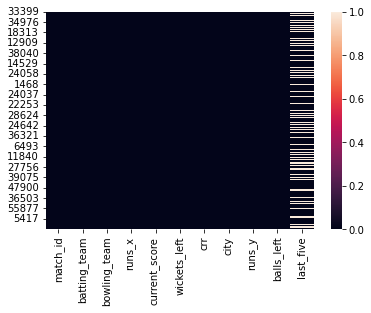

In [ ]:
sns.heatmap(dataset.isnull())

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset

,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left,last_five
28057,498,South Africa,Bangladesh,4,39,10,10.17,Johannesburg,118,97,28.0
24944,470,South Africa,England,0,27,9,7.36,Cape Town,154,98,22.0
23317,452,New Zealand,Sri Lanka,4,24,10,16.00,Wellington,162,111,24.0
60175,880,West Indies,Sri Lanka,1,148,4,8.00,Colombo,162,9,24.0
841,12,South Africa,New Zealand,1,136,7,9.38,Auckland,185,33,22.0
...,...,...,...,...,...,...,...,...,...,...,...
38263,607,New Zealand,Sri Lanka,6,25,10,7.50,Lauderhill,120,100,41.0
50041,742,England,West Indies,2,115,8,8.62,Barbados,165,40,41.0
60269,893,South Africa,Sri Lanka,0,13,8,4.11,Johannesburg,113,101,42.0
35701,576,Sri Lanka,England,0,40,7,5.33,St Lucia,128,75,44.0


In [ ]:
eligible_cities = dataset['city'].value_counts()[dataset['city'].value_counts() > 600].index.tolist()
final_dataset = dataset[dataset['city'].isin(eligible_cities)]

In [ ]:
final_dataset

,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left,last_five
28057,498,South Africa,Bangladesh,4,39,10,10.17,Johannesburg,118,97,28.0
24944,470,South Africa,England,0,27,9,7.36,Cape Town,154,98,22.0
23317,452,New Zealand,Sri Lanka,4,24,10,16.00,Wellington,162,111,24.0
60175,880,West Indies,Sri Lanka,1,148,4,8.00,Colombo,162,9,24.0
841,12,South Africa,New Zealand,1,136,7,9.38,Auckland,185,33,22.0
...,...,...,...,...,...,...,...,...,...,...,...
38263,607,New Zealand,Sri Lanka,6,25,10,7.50,Lauderhill,120,100,41.0
50041,742,England,West Indies,2,115,8,8.62,Barbados,165,40,41.0
60269,893,South Africa,Sri Lanka,0,13,8,4.11,Johannesburg,113,101,42.0
35701,576,Sri Lanka,England,0,40,7,5.33,St Lucia,128,75,44.0


In [ ]:
final_dataset.to_csv('match_final.csv')

In [ ]:
df_copy.to_csv('df_copy_df3.csv')

![image.png](attachment:image.png)

In [ ]:
df = pd.read_csv('match_final.csv')

In [ ]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left,last_five
0,28057,498,South Africa,Bangladesh,4,39,10,10.17,Johannesburg,118,97,28.0
1,24944,470,South Africa,England,0,27,9,7.36,Cape Town,154,98,22.0
2,23317,452,New Zealand,Sri Lanka,4,24,10,16.00,Wellington,162,111,24.0
3,60175,880,West Indies,Sri Lanka,1,148,4,8.00,Colombo,162,9,24.0
4,841,12,South Africa,New Zealand,1,136,7,9.38,Auckland,185,33,22.0


In [ ]:
import matplotlib.pyplot as plt

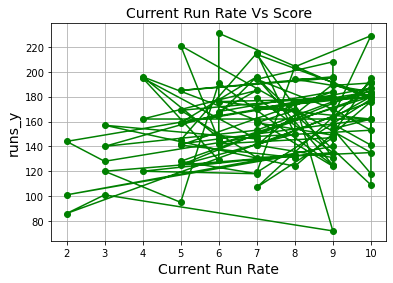

In [ ]:
# df.loc[:100,['crr']]
x = df.loc[:100,['wickets_left']]
y = df.loc[:100,['runs_y']]

plt.plot(x, y, color='green', marker='o')
plt.title('Current Run Rate Vs Score', fontsize=14)
plt.xlabel('Current Run Rate', fontsize=14)
plt.ylabel('runs_y', fontsize=14)
plt.grid(True)


<AxesSubplot:xlabel='wickets_left', ylabel='runs_y'>

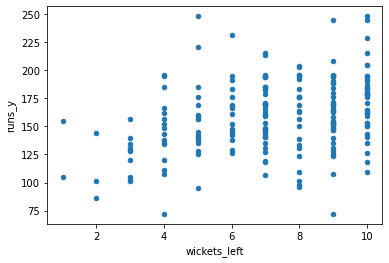

In [ ]:
df.loc[:200,['last_five','runs_y']].plot.scatter('last_five','runs_y')

## Importing Modules

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Unnamed: 0', 'match_id', 'batting_team', 'bowling_team', 'runs_x',
       'current_score', 'wickets_left', 'crr', 'city', 'runs_y', 'balls_left',
       'last_five'],
      dtype='object')

In [ ]:
df = df[['batting_team', 'bowling_team', 'runs_x',
       'current_score', 'wickets_left', 'crr', 'city', 'balls_left',
       'last_five','runs_y']]

In [ ]:
df.rename(columns = {'runs_y': 'final_score'} ,inplace=True)


C:\Users\abrar\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,balls_left,last_five,final_score
0,South Africa,Bangladesh,4,39,10,10.17,Johannesburg,97,28.0,118
1,South Africa,England,0,27,9,7.36,Cape Town,98,22.0,154
2,New Zealand,Sri Lanka,4,24,10,16.00,Wellington,111,24.0,162
3,West Indies,Sri Lanka,1,148,4,8.00,Colombo,9,24.0,162
4,South Africa,New Zealand,1,136,7,9.38,Auckland,33,22.0,185


In [ ]:
df.head()

,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,balls_left,last_five,final_score
0,South Africa,Bangladesh,4,39,10,10.17,Johannesburg,97,28.0,118
1,South Africa,England,0,27,9,7.36,Cape Town,98,22.0,154
2,New Zealand,Sri Lanka,4,24,10,16.00,Wellington,111,24.0,162
3,West Indies,Sri Lanka,1,148,4,8.00,Colombo,9,24.0,162
4,South Africa,New Zealand,1,136,7,9.38,Auckland,33,22.0,185


In [ ]:
df.corr()

,runs_x,current_score,wickets_left,crr,balls_left,last_five,final_score
runs_x,1.000000,0.142673,0.027625,0.252544,-0.083261,-0.001695,0.147966
current_score,0.142673,1.000000,-0.596802,0.435113,-0.924344,0.001234,0.297245
wickets_left,0.027625,-0.596802,1.000000,0.073713,0.771228,0.002396,0.288511
crr,0.252544,0.435113,0.073713,1.000000,-0.186703,0.005094,0.513136
balls_left,-0.083261,-0.924344,0.771228,-0.186703,1.000000,0.002696,-0.034524
last_five,-0.001695,0.001234,0.002396,0.005094,0.002696,1.000000,0.007503
final_score,0.147966,0.297245,0.288511,0.513136,-0.034524,0.007503,1.000000


In [ ]:
df['city'].nunique()

25

In [ ]:
check = df.copy()

In [ ]:
check.drop(columns = ['runs_x'] , inplace =True)

In [ ]:
non_numericals = pd.get_dummies(check[['batting_team','bowling_team']])
numericals = check[['current_score','crr','crr','balls_left','last_five','final_score']]


In [ ]:
final_data = pd.concat([non_numericals,numericals],axis=1)

In [ ]:
final_data

,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,batting_team_New Zealand,batting_team_Pakistan,batting_team_South Africa,batting_team_Sri Lanka,batting_team_West Indies,...,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,bowling_team_West Indies,current_score,crr,crr,balls_left,last_five,final_score
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,39,10.17,10.17,97,28.0,118
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,27,7.36,7.36,98,22.0,154
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,24,16.00,16.00,111,24.0,162
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,148,8.00,8.00,9,24.0,162
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,136,9.38,9.38,33,22.0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33808,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,25,7.50,7.50,100,41.0,120
33809,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,115,8.62,8.62,40,41.0,165
33810,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,13,4.11,4.11,101,42.0,113
33811,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,40,5.33,5.33,75,44.0,128


In [ ]:
final_data.columns

Index(['batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_New Zealand', 'batting_team_Pakistan',
       'batting_team_South Africa', 'batting_team_Sri Lanka',
       'batting_team_West Indies', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_New Zealand', 'bowling_team_Pakistan',
       'bowling_team_South Africa', 'bowling_team_Sri Lanka',
       'bowling_team_West Indies', 'current_score', 'crr', 'crr', 'balls_left',
       'last_five', 'final_score'],
      dtype='object')

In [ ]:
X = final_data.drop(columns=['final_score'])
y = final_data['final_score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin  = LinearRegression()

In [ ]:
lin.fit(X_train,y_train)

LinearRegression()

# Not performing good on Linear Regeression

In [ ]:
#This means that 51.79% of the variation in the final score can be explained by the columns input

In [ ]:
lin.score(X_train,y_train)

0.5179992200900365

In [ ]:
y_pred = lin.predict(X_test)
print(r2_score(y_test,y_pred))

0.5189033951274971


# Now Trying to predict Using Random Forest Regressor

In [ ]:
df2= df.copy()
df2.drop(columns = ['runs_x'] , inplace =True)

In [ ]:

X = df2.drop(columns=['final_score'])
y = df2['final_score']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:

# non_numericals = pd.get_dummies(df2[['batting_team','bowling_team','city']])
# numericals = check[['current_score','crr','crr','balls_left','last_five','runs_y']]

# final_data2 = pd.concat([non_numericals,numericals],axis=1)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# print("ASdasd")

# X = final_data2.drop(columns=['runs_y'])
# y = final_data2['runs_y']


trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',regressor)
])


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)





In [ ]:
X_train.columns

Index(['batting_team', 'bowling_team', 'current_score', 'wickets_left', 'crr',
       'city', 'balls_left', 'last_five'],
      dtype='object')

In [ ]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9225563708827677
4.171777222703366


![image.png](attachment:image.png)

In [ ]:
match1 = pd.DataFrame(
    {'batting_team' :['India'],
     'bowling_team':['Pakistan'],
     'current_score': [52], 
     'wickets_left' :[7] ,
     'crr':[5.7],
     'city':['Dubai'],
     'balls_left':[66],
     'last_five':[31]
    }
)


print("Predicted Final Score = ",np.round(pipe.predict(match1)))

Predicted Final Score =  [144.]


In [ ]:
batting_team = 'India'
bowling_team = 'England'
currScore = 67
wickets_left = 8
crr = 6.7
city = 'India'
balls_left = 60
last_five = 21

match2 = pd.DataFrame(
    {'batting_team' :[batting_team],
     'bowling_team':[bowling_team], 
     'current_score': [currScore],
     'wickets_left' :[wickets_left] ,
     'crr':[crr],
     'city':['Dubai'],
     'balls_left':[balls_left],
     'last_five':[last_five]
    }
)

print("Predicted Final Score = ",np.round(pipe.predict(match2)))


Predicted Final Score =  [148.]
